In [157]:
import numpy as np # numerical python
import pandas as pd # for processing data
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import  TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [107]:
GOLD_DF = pd.read_csv('FINAL_USO.csv', na_values = ['N/A'], index_col = 'Date', parse_dates = True, infer_datetime_format = True)
GOLD_DF.head() #getting a general idea about our data frame created through Pandas

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [108]:
#checking for any missing values
GOLD_DF.isnull().sum() #found no missing values

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64

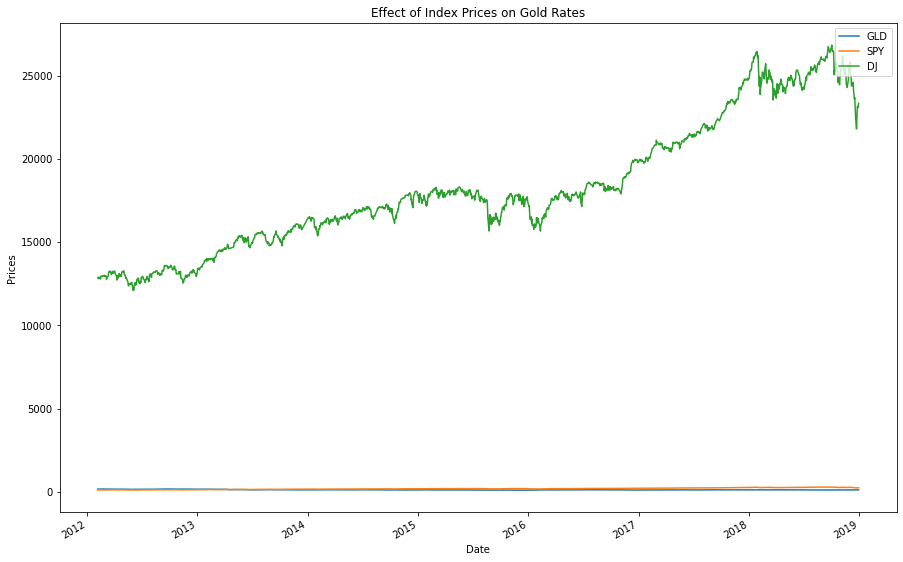

In [160]:
# Visualization of data
goldAdjClose = GOLD_DF['Adj Close']
spyAdjClose = GOLD_DF['SP_Ajclose']
djAdjClose = GOLD_DF['DJ_Ajclose']

gold_df_p = pd.DataFrame({'GLD': goldAdjClose, 'SPY': spyAdjClose, 'DJ': djAdjClose})
gold_df_ax = gold_df_p.plot(title = 'Effect of Index Prices on Gold Rates', figsize = (15,10))
gold_df_ax.set_ylabel('Prices')
gold_df_ax.legend(loc = 'upper right')
plt.show()

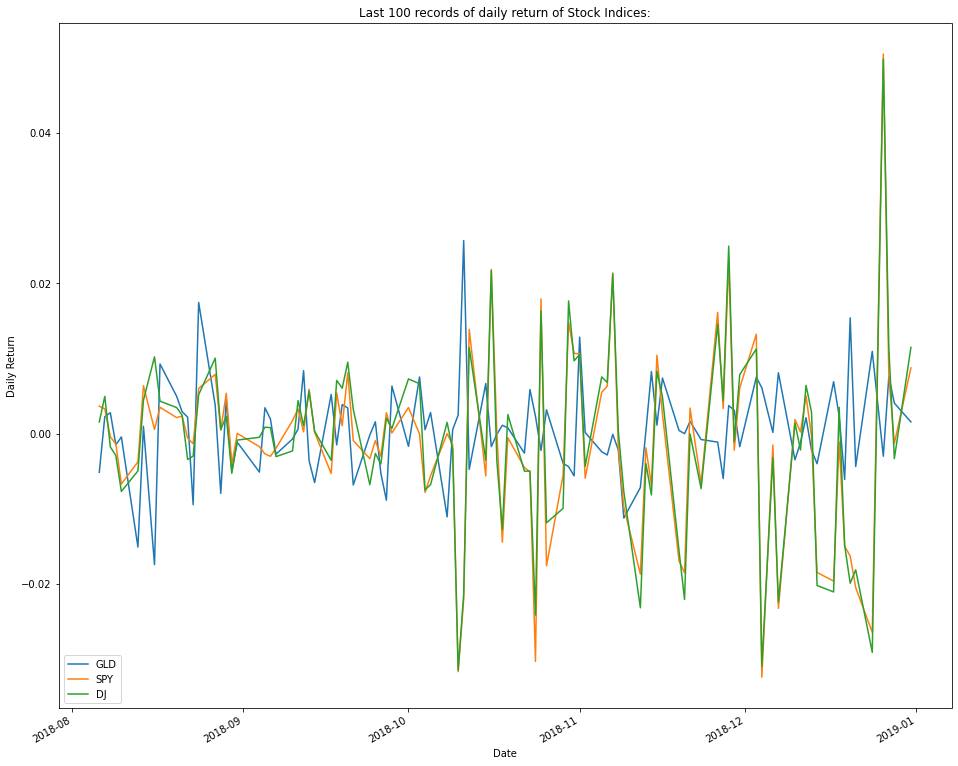

In [110]:
#Calculation for daily returns for each feature
def calc_daily_returns(dataFrame): # calculate and return daily returns values
    daily_returns = (dataFrame / dataFrame.shift(1)) - 1
    daily_returns[0] = 0
    return daily_returns
#Computing daily return for stock prices
gld_adj_close = GOLD_DF['Adj Close']
spy_adj_close = GOLD_DF['SP_Ajclose']
dj_adj_close = GOLD_DF['DJ_Ajclose']
eg_adj_close = GOLD_DF['EG_Ajclose']
uso_adj_close = GOLD_DF['USO_Adj Close']
gdx_adj_close = GOLD_DF['GDX_Adj Close']
eu_price = GOLD_DF['EU_Price']
of_price = GOLD_DF['OF_Price']
os_price = GOLD_DF['OS_Price']
sf_price = GOLD_DF['SF_Price']
usb_price = GOLD_DF['USB_Price']
plt_price = GOLD_DF['PLT_Price']
pld_price = GOLD_DF['PLD_Price']
rho_price = GOLD_DF['RHO_PRICE']
usdi_price = GOLD_DF['USDI_Price']

gld_daily_returns = calc_daily_returns(gld_adj_close)
spy_daily_returns = calc_daily_returns(spy_adj_close)
dj_adj_returns = calc_daily_returns(dj_adj_close)
eg_adj_returns = calc_daily_returns(eg_adj_close)
uso_adj_returns = calc_daily_returns(uso_adj_close)
gdx_adj_returns = calc_daily_returns(gdx_adj_close)
eu_returns = calc_daily_returns(eu_price)
of_returns = calc_daily_returns(of_price)
os_returns = calc_daily_returns(os_price)
sf_returns = calc_daily_returns(sf_price)
usb_returns = calc_daily_returns(usb_price)
plt_returns = calc_daily_returns(plt_price)
pld_returns = calc_daily_returns(pld_price)
rho_returns = calc_daily_returns(rho_price)
usdi_returns = calc_daily_returns(usdi_price)

gold_df_d = pd.DataFrame({'GLD': gld_daily_returns, 'SPY': spy_daily_returns, 'DJ': dj_adj_returns, 'EG': eg_adj_returns, 'USO': uso_adj_returns, 'GDX': gdx_adj_returns, 'EU': eu_returns, 'OF': of_returns, 'OS': os_returns, 'SF': sf_returns, 'USB': usb_returns, 'PLT': plt_returns, 'PLD': pld_returns, 'RHO': rho_returns, 'USDI': usdi_returns})

# Calculating Daily Return of Stock Prices
gold_df_s = pd.DataFrame({'GLD': gld_daily_returns, 'SPY': spy_daily_returns, 'DJ': dj_adj_returns})
gold_daily_ax = gold_df_s[-100:].plot(title = 'Last 100 records of daily return of Stock Indices:', figsize = (16,14))
gold_daily_ax.set_ylabel('Daily Return')
gold_daily_ax.legend(loc = 'lower left')

plt.show()

<AxesSubplot:xlabel='USDI', ylabel='GLD'>

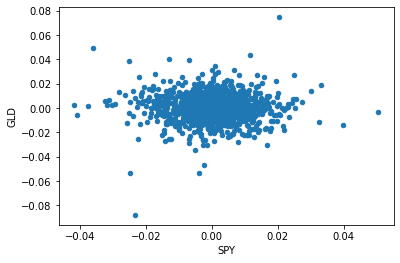

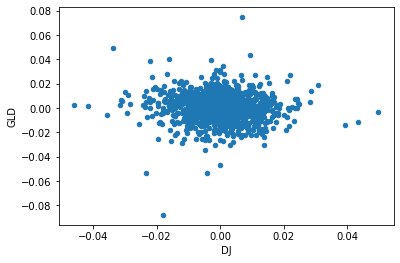

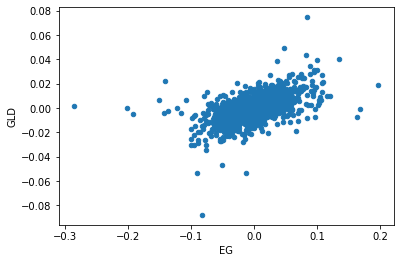

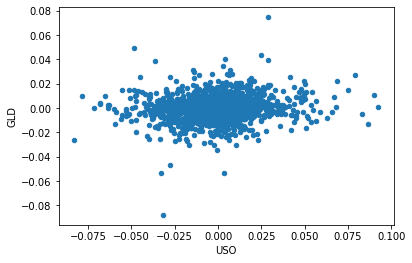

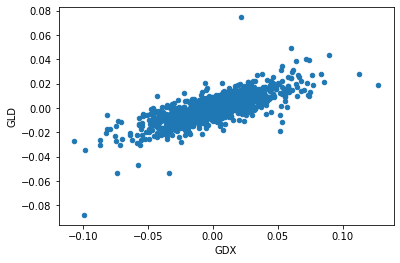

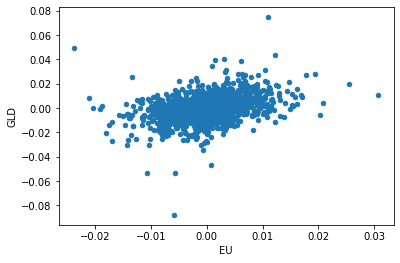

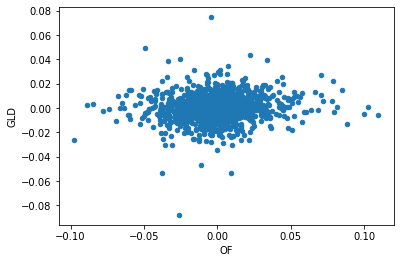

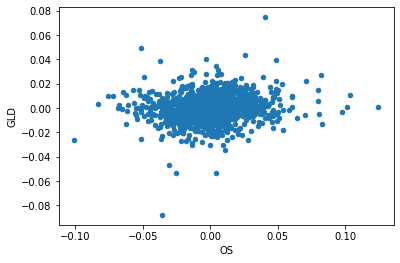

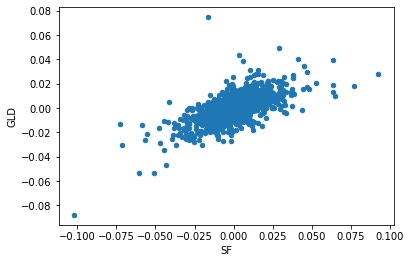

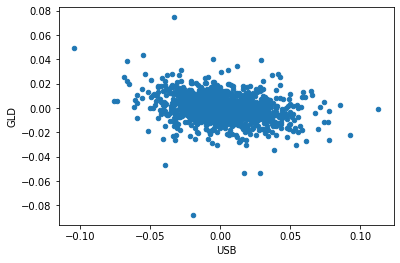

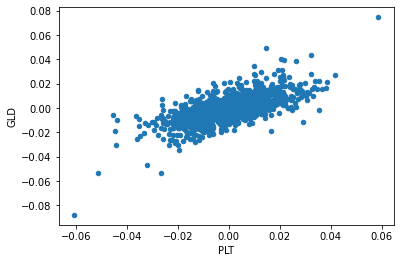

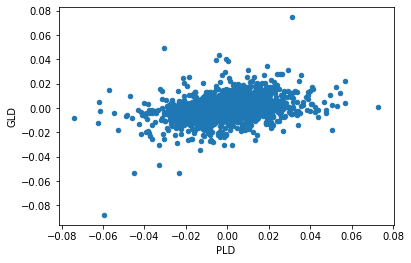

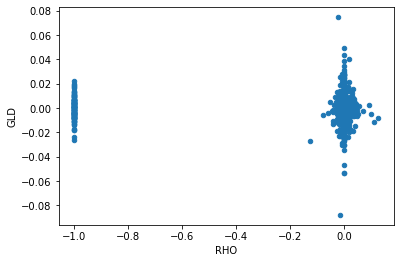

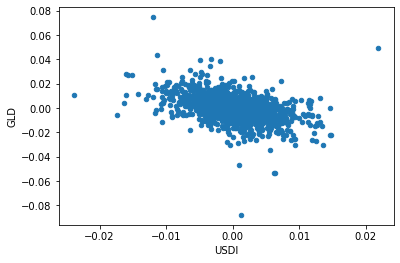

In [111]:
gold_df_d.plot(kind = 'scatter', x = 'SPY', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'DJ', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'EG', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'USO', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'GDX', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'EU', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'OF', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'OS', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'SF', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'USB', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'PLT', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'PLD', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'RHO', y = 'GLD')
gold_df_d.plot(kind = 'scatter', x = 'USDI', y = 'GLD')
#Scatter Plots for deviation against Gold prices

Mean =  -8.65698612128203e-05
Standard deviation =  0.009611536167006381
Kurtosis =  8.606584924918355


<Figure size 1080x576 with 0 Axes>

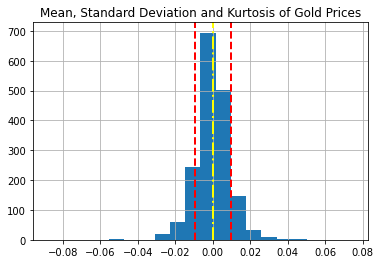

<Figure size 1080x576 with 0 Axes>

In [112]:
# Calculating Mean, Stnadard Deviation and Kurtosis
gold_mean = gold_df_d['GLD'].mean() #calculating mean of gold prices
gold_std = gold_df_d['GLD'].std() # standard deviation
gold_kurt = gold_df_d['GLD'].kurtosis() # kurtosis value

print('Mean = ', gold_mean)
print('Standard deviation = ', gold_std)
print('Kurtosis = ', gold_kurt)

gold_df_d['GLD'].hist(bins = 20) # plotting a histogram

plt.axvline(gold_mean, color = 'yellow', linestyle = '-.', linewidth = 2)
plt.axvline(gold_std, color = 'red', linestyle = '--', linewidth = 2)
plt.axvline(-gold_std, color = 'red', linestyle = '--', linewidth = 2)
plt.title('Mean, Standard Deviation and Kurtosis of Gold Prices')
plt.figure(figsize = (15,8))

<AxesSubplot:>

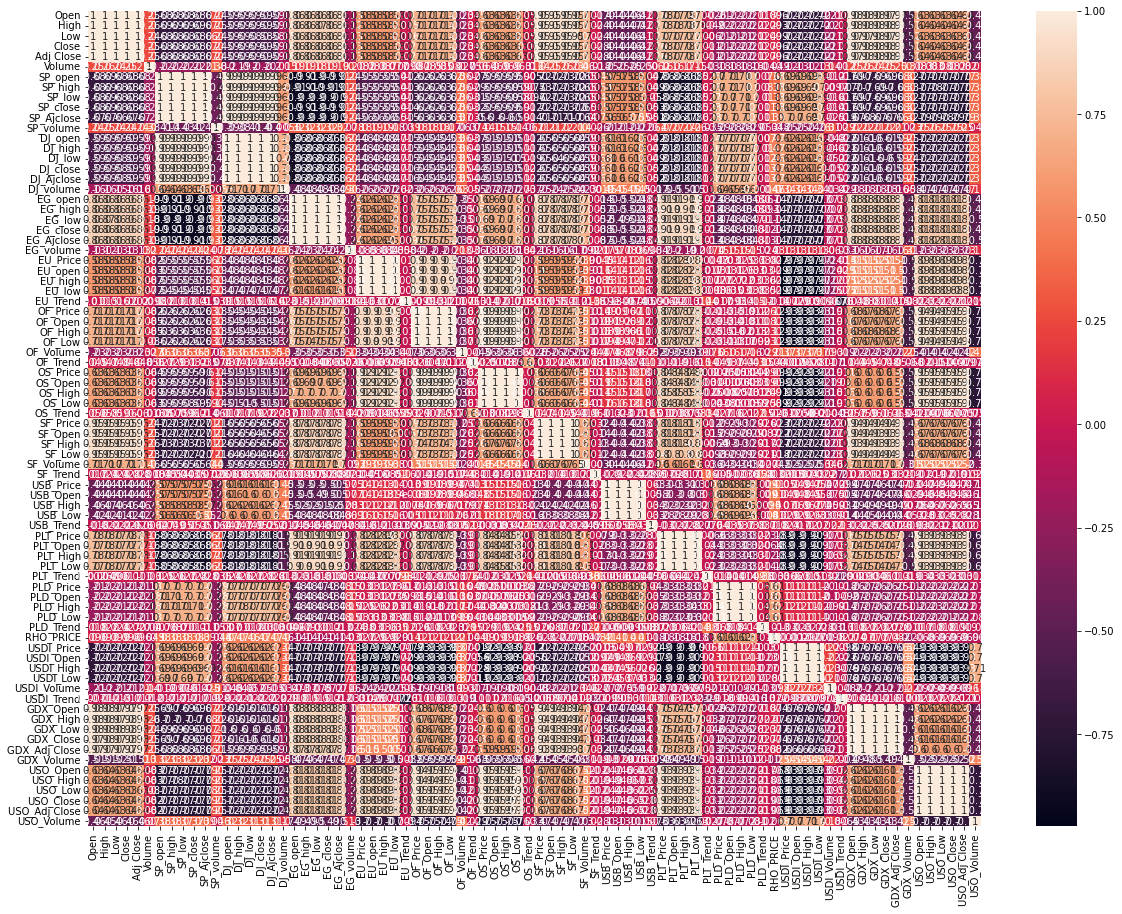

In [113]:
# Analysing Correlation between different Features as a HeatMap
plt.figure(figsize = (20,15))
correlations = GOLD_DF.corr()
sns.heatmap(correlations, annot = True)

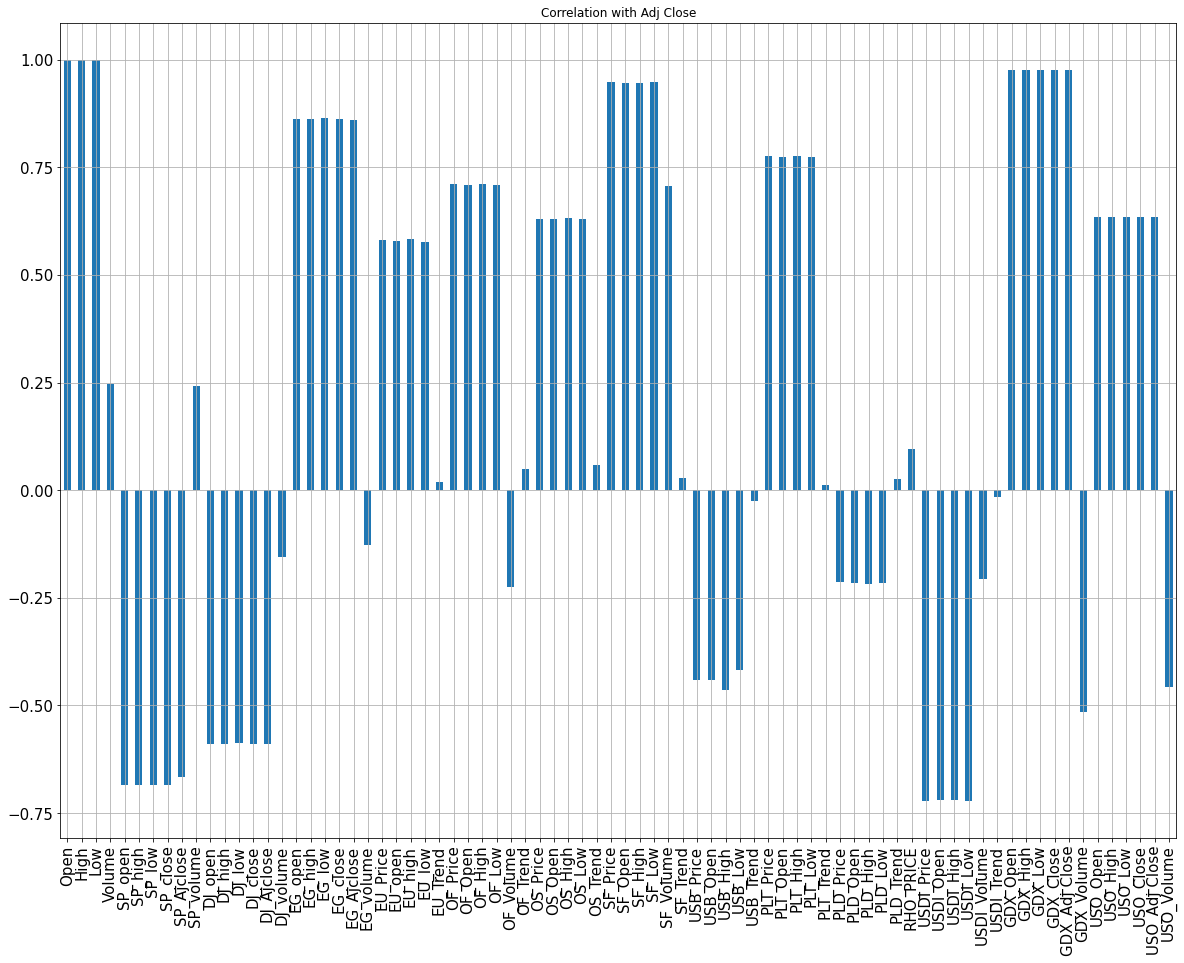

In [114]:
# Dropping Adj Close and Close from our dataframe
Original = GOLD_DF.drop(['Adj Close'], axis = 1)
Original = Original.drop(['Close'], axis = 1)
# Plotting correlations with Adj Close
Original.corrwith(GOLD_DF['Adj Close']).plot.bar(title = 'Correlation with Adj Close', rot = 90, grid = True, figsize = (20,15), fontsize = 15)
plt.show()

In [115]:
correlation_matrix = GOLD_DF.corr()
coeff = correlation_matrix['Adj Close'].sort_values(ascending = False)
posi_corr = coeff[coeff > 0]
posi_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

In [116]:
neg_corr = coeff[coeff < 0]
neg_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

In [117]:
# Functions to Calculate Technical Indicators
def compute_macd(df, nslow = 26, nfast = 12):
    emaslow = df.ewm(span = nslow, min_periods = nslow, adjust = True, ignore_na = False).mean()
    emafast = df.ewm(span = nfast, min_periods = nfast, adjust = True, ignore_na = False).mean()
    diff = emafast - emaslow
    macd = diff.ewm(span = 9, min_periods = 9, adjust = True, ignore_na = False).mean()
    return diff, macd

def compute_rsi(df, periods = 14):
    dif = df.diff()
    up, down = dif.copy(), dif.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    rsi_up = up.ewm(com = periods, adjust = False).mean()
    rsi_down = down.ewm(com = periods, adjust = False).mean().abs()
    rsi = 100 - 100 / (1 + rsi_up / rsi_down)
    return rsi

def compute_sma(df, periods = 15):
    sma = df.rolling(window = periods, min_periods = periods, center = False).mean()
    return sma

def compute_bands(df, periods = 15):
    std = df.rolling(window = periods, min_periods = periods, center = False).std()
    sma = compute_sma(df)
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    return upper_band, lower_band

def compute_std_dev(df, periods = 5):
    std_dev = df.rolling(periods).std()
    return std_dev

In [118]:
sma_gld = compute_sma(gld_adj_close) # computing the simple moving average for GLD
upper_band, lower_band = compute_bands(gld_adj_close) # calculating Bollinger Bands for GLD
dif, macd = compute_macd(gld_adj_close) # Calculating MACD for GLD
rsi = compute_rsi(gld_adj_close) # Calculating RSI for GLD
std_dev = compute_std_dev(gld_adj_close) # Calculating Standard Deviation for GLD
open_close = GOLD_DF.Open - GOLD_DF.Close
high_low = GOLD_DF.High - GOLD_DF.Low
# Adding these indicators to our main dataframe
GOLD_DF['SMA'] = sma_gld
GOLD_DF['Upper Band'] = upper_band
GOLD_DF['Lower Band'] = lower_band
GOLD_DF['DIF'] = dif
GOLD_DF['MACD'] = macd
GOLD_DF['RSI'] = rsi
GOLD_DF['Std Dev'] = std_dev
GOLD_DF['Open_Close'] = open_close
GOLD_DF['High_Low'] = high_low
# Dropping NA values recieved due to Adding technical indicators
GOLD_DF.dropna(inplace=True)
GOLD_DF.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper Band,Lower Band,DIF,MACD,RSI,Std Dev,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,166.960007,167.679993,166.610001,167.179993,167.179993,8807400,133.979996,134.509995,133.830002,134.449997,...,6126100,165.198666,173.018365,157.378968,2.724443,2.641891,70.144545,1.562107,-0.219986,1.069992
2012-02-07,167.380005,170.089996,167.149994,169.699997,169.699997,11614300,134.169998,135.020004,133.639999,134.789993,...,10237000,165.894667,173.296304,158.493029,2.754381,2.667095,73.152763,1.594111,-2.319992,2.940002
2012-02-08,169.259995,169.960007,167.500000,168.500000,168.500000,10655500,134.860001,135.220001,134.309998,135.190002,...,9045800,166.428000,173.297467,159.558533,2.655845,2.664634,69.576023,1.575718,0.759995,2.460007
2012-02-09,170.009995,170.369995,167.669998,168.020004,168.020004,16085200,135.410004,135.589996,134.559998,135.360001,...,4663500,166.856000,173.217507,160.494493,2.511947,2.631843,68.148015,0.965153,1.989991,2.699997
2012-02-10,166.490005,167.639999,166.330002,167.139999,167.139999,10326800,134.160004,134.470001,133.839996,134.360001,...,6008600,167.250666,172.795817,161.705515,2.303734,2.562404,65.507009,1.059963,-0.649994,1.309997


In [143]:
target_adj_close = pd.DataFrame(GOLD_DF['Adj Close'])
col = GOLD_DF.columns
col

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

In [144]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume',
       'SMA', 'Upper Band', 'Lower Band', 'DIF', 'MACD', 'RSI', 'Std Dev',
       'Open_Close', 'High_Low']
feat_minmax_trans_data = MinMaxScaler().fit_transform(GOLD_DF[features])
feat_minmax_transform = pd.DataFrame(columns = features , data = feat_minmax_trans_data, index = GOLD_DF.index)
feat_minmax_transform.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper Band,Lower Band,DIF,MACD,RSI,Std Dev,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.912050,0.912050,0.079151,0.037098,0.034927,0.040627,0.038373,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.946519,0.946519,0.109560,0.038247,0.038015,0.039473,0.040428,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.930105,0.930105,0.099173,0.042423,0.039225,0.043542,0.042845,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.923540,0.923540,0.157998,0.045752,0.041465,0.045060,0.043872,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.911503,0.911503,0.095612,0.038187,0.034685,0.040687,0.037829,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


In [145]:
display(feat_minmax_transform.head())
print('Shape of features: ', feat_minmax_transform.shape)
print('Shape of target: ', target_adj_close.shape)

target_adj_close = target_adj_close.shift(-1) # to predict the target on the (n+1)th day
validation_yvalue = target_adj_close[-85:-1]
target_adj_close = target_adj_close[:-85]

validation_xvalue = feat_minmax_transform[-85:-1] # taking last 85 rows to be as validation set
feat_minmax_transform = feat_minmax_transform[:-85]
display(validation_xvalue.tail())
display(validation_yvalue.tail())

print('\n AFTER PROCESS \n')
print('Shape of features: ', feat_minmax_transform.shape)
print('Shape of target: ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper Band,Lower Band,DIF,MACD,RSI,Std Dev,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.912050,0.912050,0.079151,0.037098,0.034927,0.040627,0.038373,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.946519,0.946519,0.109560,0.038247,0.038015,0.039473,0.040428,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.930105,0.930105,0.099173,0.042423,0.039225,0.043542,0.042845,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.923540,0.923540,0.157998,0.045752,0.041465,0.045060,0.043872,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.911503,0.911503,0.095612,0.038187,0.034685,0.040687,0.037829,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


Shape of features:  (1685, 89)
Shape of target:  (1685, 1)


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper Band,Lower Band,DIF,MACD,RSI,Std Dev,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-21,0.252767,0.249863,0.252304,0.249214,0.249214,0.131396,0.719499,0.732264,0.685249,0.680445,...,0.346662,0.221370,0.217009,0.228105,0.658641,0.648503,0.687759,0.071990,0.459268,0.050107
2018-12-24,0.258024,0.262042,0.266061,0.266995,0.266995,0.089215,0.672900,0.678571,0.650574,0.642011,...,0.188254,0.225663,0.221905,0.231591,0.673309,0.655308,0.771343,0.103731,0.400256,0.038380
2018-12-26,0.272551,0.273810,0.266061,0.262071,0.262071,0.138587,0.654321,0.710896,0.647477,0.713561,...,0.365682,0.228778,0.225424,0.234153,0.680140,0.662243,0.728779,0.105509,0.490699,0.130064
2018-12-27,0.271859,0.272441,0.273903,0.274518,0.274518,0.112378,0.694263,0.723668,0.679055,0.724982,...,0.325400,0.232083,0.233069,0.232846,0.692906,0.670576,0.782400,0.071859,0.429121,0.058636
2018-12-28,0.275042,0.274904,0.281882,0.281220,0.281220,0.058103,0.736686,0.742494,0.724540,0.723048,...,0.199288,0.235840,0.241125,0.232010,0.706157,0.680136,0.808642,0.092629,0.412444,0.015992


,Adj Close
Date,
2018-12-21,120.019997
2018-12-24,119.660004
2018-12-26,120.570000
2018-12-27,121.059998
2018-12-28,121.250000



 AFTER PROCESS 

Shape of features:  (1600, 89)
Shape of target:  (1600, 1)


,Adj Close
Date,
2018-08-21,113.269997
2018-08-22,112.199997
2018-08-23,114.160004
2018-08-24,114.589996
2018-08-27,113.680000


In [159]:
for train_index, test_index in TimeSeriesSplit(n_splits = 10).split(feat_minmax_transform):
    x_train, x_test = feat_minmax_transform[:len(train_index)],feat_minmax_transform[len(train_index):(len(train_index) + len(test_index))]
    y_train, y_test = target_adj_close[:len(train_index)].values.ravel(),target_adj_close[len(train_index):(len(train_index)+len(test_index))].values.ravel()
print(x_train.shape,'\n',x_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(1455, 89) 
 (145, 89) 
 (1455,) 
 (145,)


In [147]:
# Function to validate our results of a model
def result_validation(model, model_name):
    predicted = model.predict(validation_xvalue)
    rmse_score = np.sqrt(mean_squared_error(validation_yvalue, predicted))
    print('Root Mean Squared Error: ', rmse_score)
    
    R2_score = r2_score(validation_yvalue, predicted)
    print('R2 Score: ', R2_score)
    
    plt.plot(validation_yvalue.index, predicted, color = 'purple', label = 'Predicted')
    plt.plot(validation_yvalue.index, validation_yvalue, color = 'green', label = 'Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + 'Predicted V/s Actual')
    plt.legend(loc = 'upper right')
    plt.show()

In [148]:
# Creating a list for our models created through different Regressions
SolnModels = {}

Root Mean Squared Error:  1.1003306276957803
R2 Score:  0.7219696847242925


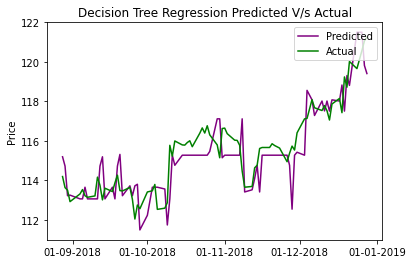

In [149]:
DecisionTree = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)
result_validation(DecisionTree, 'Decision Tree Regression ')
SolnModels['DecisionTree'] = DecisionTree

Root Mean Squared Error:  0.8193165536974938
R2 Score:  0.8458479843354144


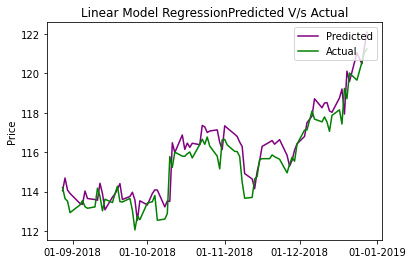

In [150]:
linear_model = LinearRegression().fit(x_train,y_train)
result_validation(linear_model,'Linear Model Regression')
SolnModels['linear_model'] = linear_model

Root Mean Squared Error:  0.7962964784557195
R2 Score:  0.8543886129120951


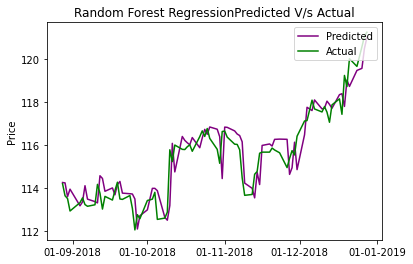

In [151]:
RandomForest = RandomForestRegressor(n_estimators=50,random_state=0).fit(x_train,y_train)
result_validation(RandomForest,'Random Forest Regression')
SolnModels['RandomForest'] = RandomForest                                           